In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
len(pd.unique(combined_data['Mouse ID']))

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate['Mouse ID'].unique()
print(duplicate_mouse_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
587,g989,0,45.000000,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(cleaned_data['Mouse ID']))

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_standard_deviation = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_standard_error = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                              "Median Tumor Volume": tumor_median,
                             "Tumor Volume Variance": tumor_variance,
                             "Tumor Volume Std. Dev.": tumor_standard_deviation,
                             "Tumor Volume Std. Err.": tumor_standard_error})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


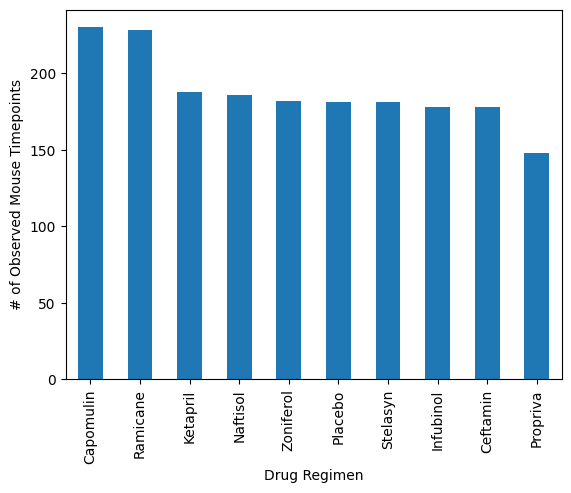

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate the bar plot
drug_regimen_counts.plot.bar()

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

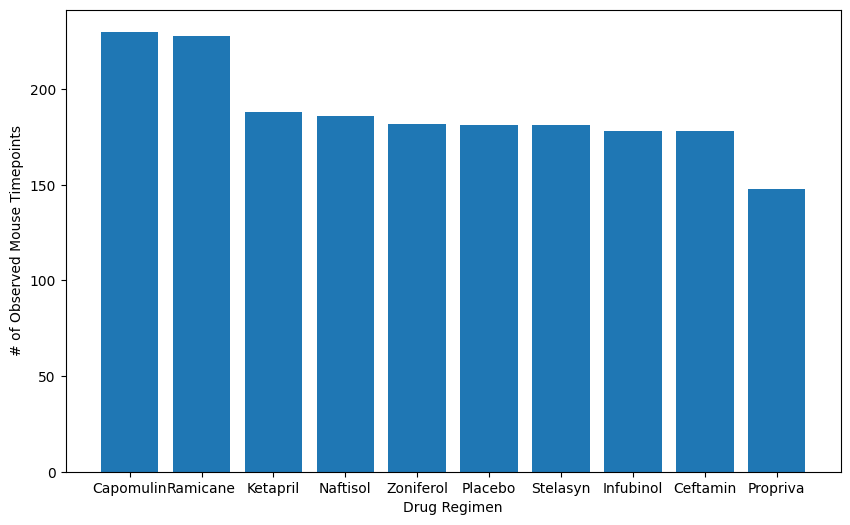

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

<Axes: ylabel='count'>

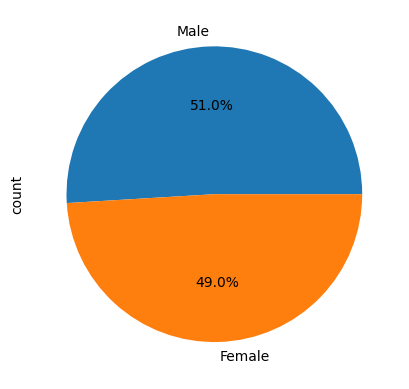

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
sex_counts = cleaned_data['Sex'].value_counts()

# Make the pie chart
sex_counts.plot.pie(autopct='%1.1f%%')

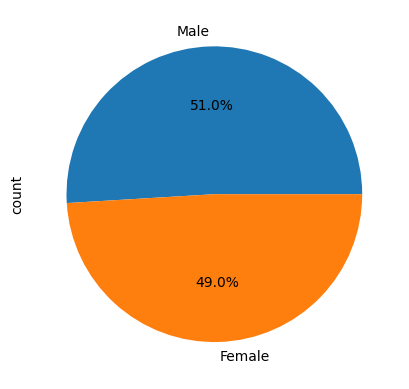

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = cleaned_data['Sex'].value_counts()

# Make the pie chart
plt.pie(sex_counts, labels = sex_counts.index, autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_data.loc[cleaned_data.groupby('Mouse ID')['Timepoint'].idxmax()]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1852,z435,10,48.710661,0,Propriva,Female,12,26
1862,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment]
    
    # add subset
    treatment_list = treatment_df['Tumor Volume (mm3)'].tolist()
    tumor_vol_data.append(treatment_list)

    # Determine outliers using upper and lower bounds
    Q1 = np.percentile(treatment_list, 25, method='midpoint')
    Q3 = np.percentile(treatment_list, 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    outliers = []
    for number in treatment_list:
        if number > upper or number < lower:
            outliers.append(number)
    print(treatment + "'s potential outliers:" + str(outliers))
    

Capomulin's potential outliers:[]
Ramicane's potential outliers:[]
Infubinol's potential outliers:[36.3213458]
Ceftamin's potential outliers:[]


Text(0, 0.5, 'Final Tumor Volume (mm3)')

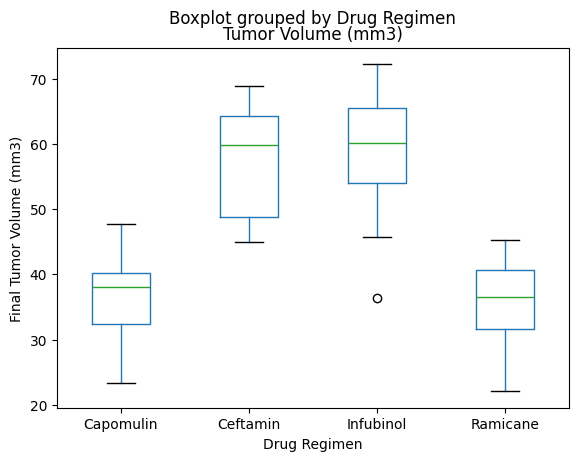

In [37]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_df = max_timepoint_df[max_timepoint_df['Drug Regimen'].isin(treatments)]
treatment_df.boxplot(by = "Drug Regimen", column = ['Tumor Volume (mm3)'], grid = False)
plt.ylabel('Final Tumor Volume (mm3)')

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

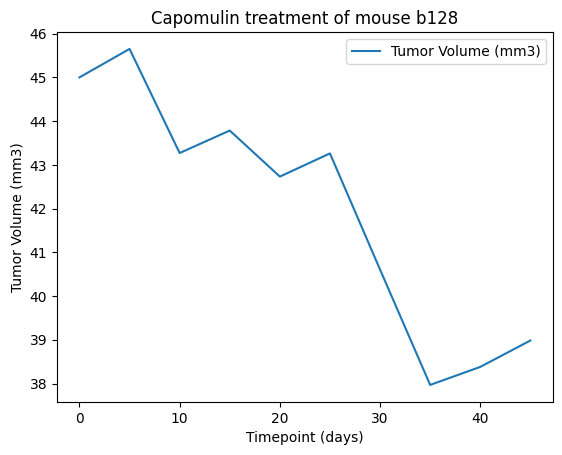

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
specific_mouse = cleaned_data[cleaned_data['Mouse ID'] == 'b128']
specific_mouse.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

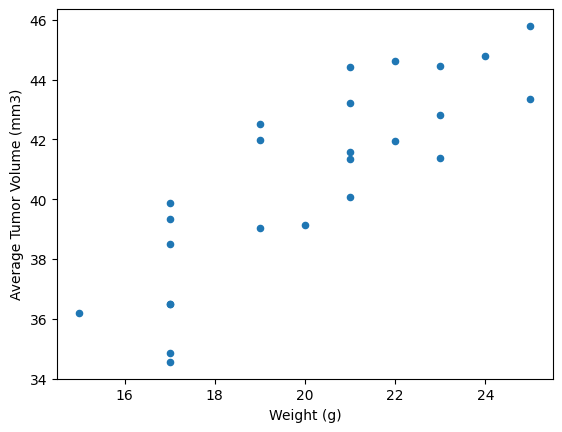

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
capomulin_mice_grouped = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mice_with_averages = pd.merge(capomulin_mice_grouped, capomulin_mice[['Mouse ID', 'Weight (g)']].drop_duplicates(), on = 'Mouse ID')
capomulin_mice_with_averages.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')

The correlation between mouse weight and the average tumor volume is 0.84


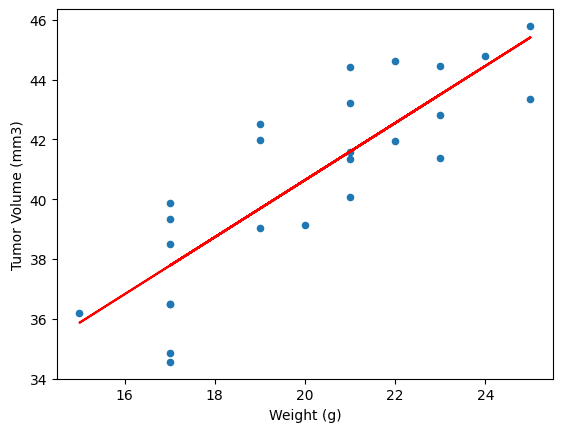

In [71]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_mice_with_averages['Weight (g)']
tumor_volume = capomulin_mice_with_averages['Tumor Volume (mm3)']
correlation_coefficient, p_value = st.pearsonr(weight, tumor_volume)
print("The correlation between mouse weight and the average tumor volume is " + str(round(correlation_coefficient, 2)))
slope, intercept = np.polyfit(weight, tumor_volume, 1)
capomulin_mice_with_averages.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.plot(weight, slope * weight + intercept, color='red')